# Ejemplo: Campos Potenciales

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/6-Planificacion-Movimiento/6-05-Campos-potenciales.ipynb)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from potential_functions import attractive_potential, repulsive_potential, repulsive_potentials

In [ ]:
%matplotlib notebook

In [ ]:
!wget -q https://raw.githubusercontent.com/oscar-ramos/robotica-autonoma-python/main/6-Planificacion-Movimiento/potential_functions.py

## 1. Campo Potencial Atractivo

<IPython.core.display.Javascript object>


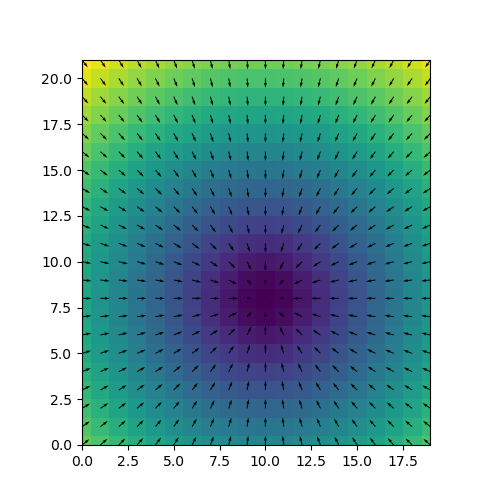

In [ ]:
# Punto deseado (final)
qf = np.array([10., 8.])

# Grilla (mapa)
xv = np.arange(0,20,1); yv = np.arange(0,22,1);
x, y = np.meshgrid(xv, yv)    # Grilla

# Parámetros
d = 2        # Dónde se cambia de curva
k = 1

# Variables para almacenamiento de U, f
Utot = np.zeros(x.shape)                      # Un valor para cada punto del mapa
ftot = np.zeros((x.shape[0], x.shape[1], 2))  # Dos valores para cada punto del mapa
# Cálculo del campo potencial atractivo para cada punto del mapa
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        # Punto (configuración) actual
        q = np.array([x[i,j], y[i,j]])
        # Campo potencial atractivo de q hacia qf
        U, f = attractive_potential(q, qf, d, k)
        Utot[i,j] = U       # Almacenar campo atractivo
        ftot[i,j,:] = f     # Almacenar fuerza atractiva

# Gráfico del mapa
plt.figure(figsize=(5,5))
plt.imshow(Utot)
plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])     # Mostrar el vector fuerza "ftot" en cada punto x,y
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])       # "Arreglar" los ejes
plt.show()

<IPython.core.display.Javascript object>


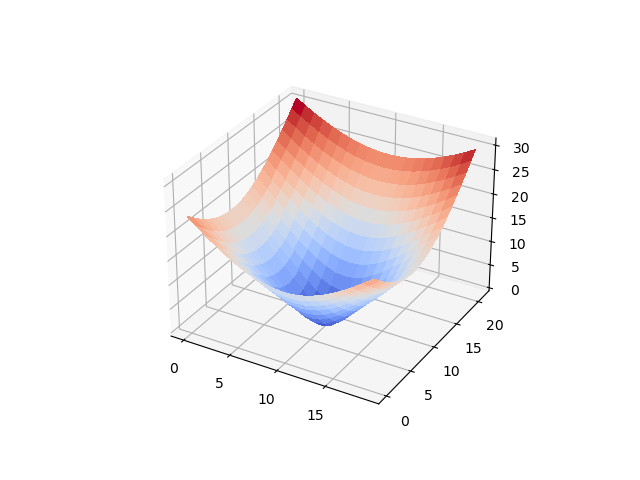

In [ ]:
# Figura en 3D del campo potencial atractivo
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, Utot, cmap=cm.coolwarm, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
plt.show()

### Planificación usando solo campos atractivos

Objetivo alcanzado en 21 iteraciones


<IPython.core.display.Javascript object>


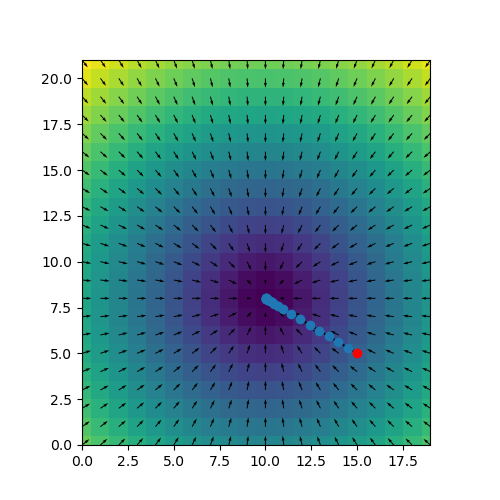

In [ ]:
# Punto inicial
pi = np.array([15., 5.])

# Trayectoria que se debe seguir
traj = pi
# 40 puntos como parte de la trayectoria
for i in range(40):
    # Cálculo del campo atractivo
    U, f = attractive_potential(pi, qf, d)
    # Movimiento en dirección de la fuerza de atracción (con un "delta"=0.5)
    pi = pi + 0.3*f
    traj = np.vstack([traj, pi])
    # Detenerse si se está suficientemente cerca del punto deseado (qf)
    if (np.linalg.norm(pi-qf) < 1e-2):
        print("Objetivo alcanzado en {} iteraciones".format(i))
        break


plt.figure(figsize=(5,5))
# Gráfico del mapa
plt.imshow(Utot)
plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])     # Mostrar el vector fuerza "ftot" en cada punto x,y
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
# Gráfico de la trayectoria
plt.plot(traj[:,0], traj[:,1], 'k'); plt.plot(traj[:,0], traj[:,1], 'o'); plt.plot(traj[0,0], traj[0,1], 'ro')
# Plot
plt.show()

## 2. Campo Potencial Repulsivo: Un solo obstáculo

<IPython.core.display.Javascript object>


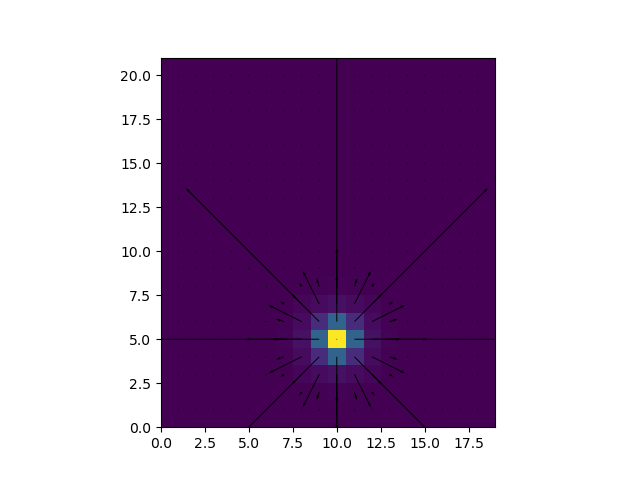

In [ ]:
# Posición para el obstáculo
qobst = np.array([10., 5.])

# Grilla (mapa)
xv = np.arange(0,20,1); yv = np.arange(0,22,1);
x, y = np.meshgrid(xv, yv)

# Parámetros
d = 5        # Distancia de influencia del obstáculo

# Variables para almacenamiento de U, f
Utot = np.zeros(x.shape);
ftot = np.zeros((x.shape[0], x.shape[1], 2))

# Calcular el potencial repulsivo
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        # Punto (configuración) actual
        q = np.array([x[i,j], y[i,j]])
        # Campo repulsivo
        U, f = repulsive_potential(q, qobst, d)
        Utot[i,j] = U
        ftot[i,j,:] = f

# Gráfico (notar que fuera de una zona "d" alrededor del obstáculo no hay influencia)
plt.figure()
plt.imshow(Utot); plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.show()

<IPython.core.display.Javascript object>


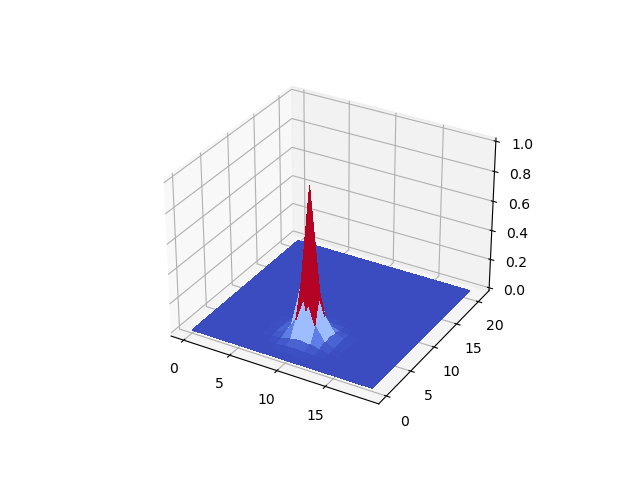

In [ ]:
# Gráfico 3D del campo repulsivo alrededor de un obstáculo (punto)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, Utot, cmap=cm.coolwarm, rstride=1, cstride=1,
                           linewidth=0, antialiased=False)
plt.show()

### Planificación para alejarse del obstáculo

Se llegó al borde de influencia del obstáculo en 15 iteraciones


<IPython.core.display.Javascript object>


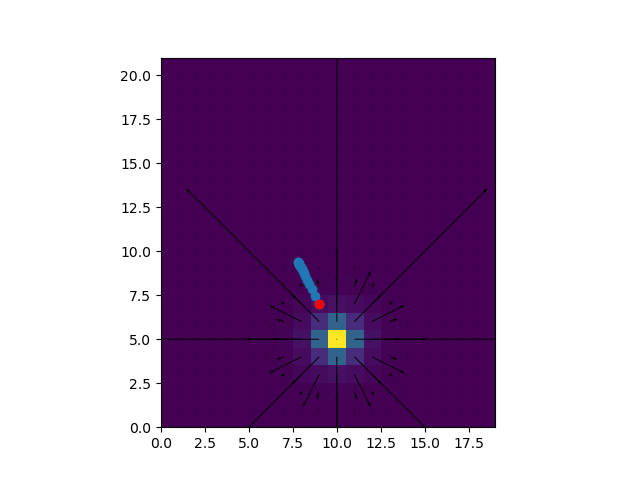

In [ ]:
# Punto inicial (dentro del área de influencia del obstáculo)
pi = np.array([9., 7.])

# Almacenamiento de la trayectoria
traj = pi
for i in range(40):
    # Campo repulsivo
    U, f = repulsive_potential(pi, qobst, d)
    # Movimiento del punto inicial usando la fuerza repulsiva: notar el factor que multiplica a f
    pi = pi + 10*i*f
    # Almacenamiento de la trayectoria
    traj = np.vstack([traj, pi])
    # Terminar si se está al borde de la zona de influencia del obstáculo
    if ( np.abs(np.linalg.norm(pi-qobst)-d) < 0.1):
        print("Se llegó al borde de influencia del obstáculo en {} iteraciones".format(i))
        break

plt.figure()
plt.imshow(Utot); plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.plot(traj[:,0], traj[:,1], 'k'); plt.plot(traj[:,0], traj[:,1], 'o'); plt.plot(traj[0,0], traj[0,1], 'ro')
# Plot
plt.show()

<IPython.core.display.Javascript object>


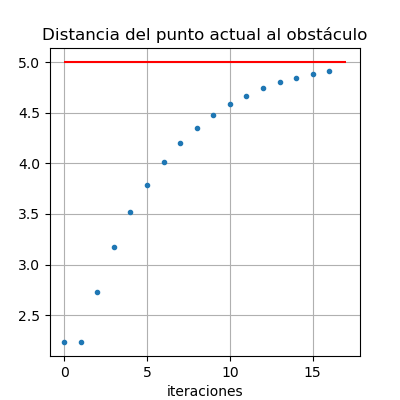

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(np.linalg.norm(traj-qobst, axis=1), '.')
plt.hlines(5, 0, traj.shape[0], color='r')
plt.title("Distancia del punto actual al obstáculo")
plt.grid()
plt.xlabel('iteraciones')
plt.show()

### Campo potencial repulsivo con varios obstáculos

<IPython.core.display.Javascript object>


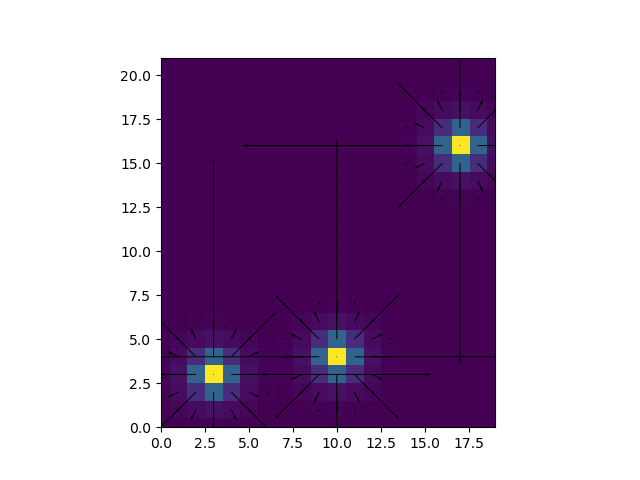

In [ ]:
# Posiciones de los obstáculos
qobst = np.array([[10., 4.],[3., 3.],[17.,16.]])

# Grilla (mapa)
xv = np.arange(0,20,1); yv = np.arange(0,22,1);
x, y = np.meshgrid(xv, yv)

# Parámetros
d = 5      # Distancia de influencia de cada obstáculo

# Almacenamiento de campo y fuerza
Utot = np.zeros(x.shape)
ftot = np.zeros((x.shape[0], x.shape[1], 2))
# Calcular el potencial repulsivo
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        # Punto en el mapa
        q = np.array([x[i,j], y[i,j]])
        # Campo repulsivo para cada punto del mapa
        U, f = repulsive_potentials(q, qobst, d)
        Utot[i,j] = U
        ftot[i,j,:] = f

plt.figure()
plt.imshow(Utot)
plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.show()

<IPython.core.display.Javascript object>


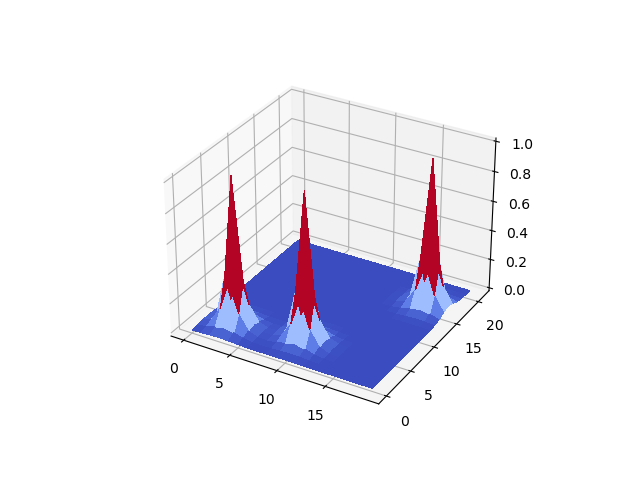

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, Utot, cmap=cm.coolwarm, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
plt.show()

<IPython.core.display.Javascript object>


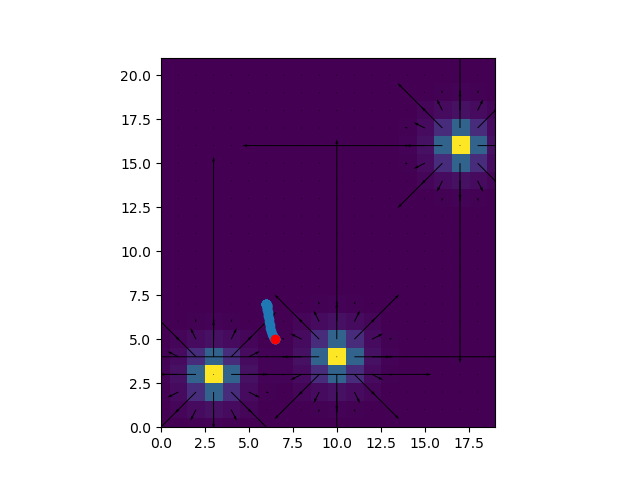

In [ ]:
# Punto inicial
pi = np.array([6.5, 5.0])

# Almacenamiento de la trayectoria
traj = pi
# Trayectoria
for i in range(40):
    U, f = repulsive_potentials(pi, qobst, d)
    pi = pi + 10*i*f
    traj = np.vstack([traj, pi])

plt.figure()
plt.imshow(Utot); plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.plot(traj[:,0], traj[:,1], 'k'); plt.plot(traj[:,0], traj[:,1], 'o'); plt.plot(traj[0,0], traj[0,1], 'ro')
# Plot
plt.show()

## 3. Campo Potencial Atractivo y Repulsivo

<IPython.core.display.Javascript object>


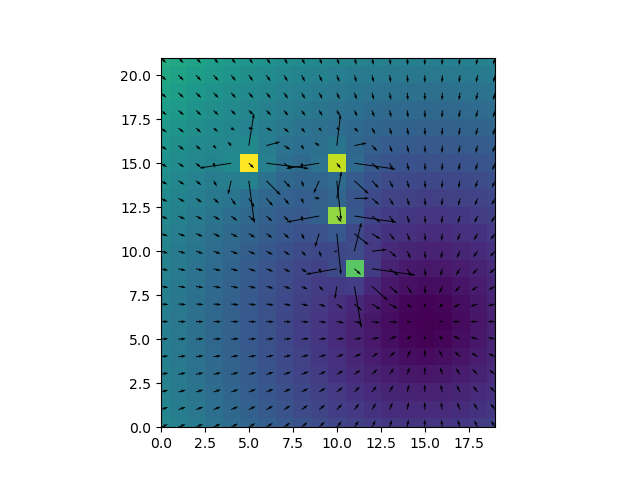

In [ ]:
# Obstáculos
qobst = np.array([[5., 15.],[10., 15.], [10., 12.,], [11., 9.]])

# Punto objetivo (goal)
qf = np.array([15., 6.])

# Grilla (mapa)
xv = np.arange(0,20,1); yv = np.arange(0,22,1)
x, y = np.meshgrid(xv, yv)

# Parámetros para campos repulsivos
d_rep = 30
k_rep = 5.0
Umax = 20
# Parámetros para campos atractivos
k_atr = 0.5
d_atr = 2

# Almacenamiento
Utot = np.zeros(x.shape)
ftot = np.zeros((x.shape[0], x.shape[1], 2))
# Cálculo para cada punto del mapa
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        # Punto actual
        q = np.array([x[i,j], y[i,j]])
        # Cálculo de campos y fuerzas
        Ur, fr = repulsive_potentials(q, qobst, d_rep, k_rep, Umax)
        Ua, fa = attractive_potential(q, qf, d_atr, k_atr)
        # Almacenamiento de la suma del campo repulsivo con el campo atractivo
        Utot[i,j] = Ur+Ua
        ftot[i,j,:] = fr+fa

plt.figure()
plt.imshow(Utot)
plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.show()

<IPython.core.display.Javascript object>


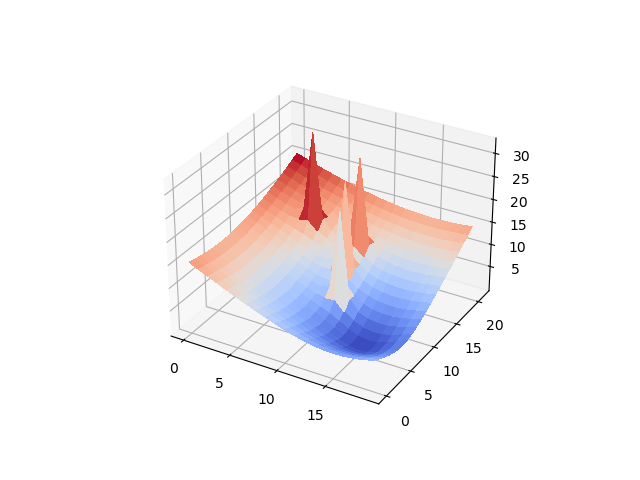

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, Utot, cmap=cm.coolwarm, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
plt.show()

### Planificación de movimiento hacia el objetivo, con obstáculos

Se llegó al objetivo en 46 iteraciones


<IPython.core.display.Javascript object>


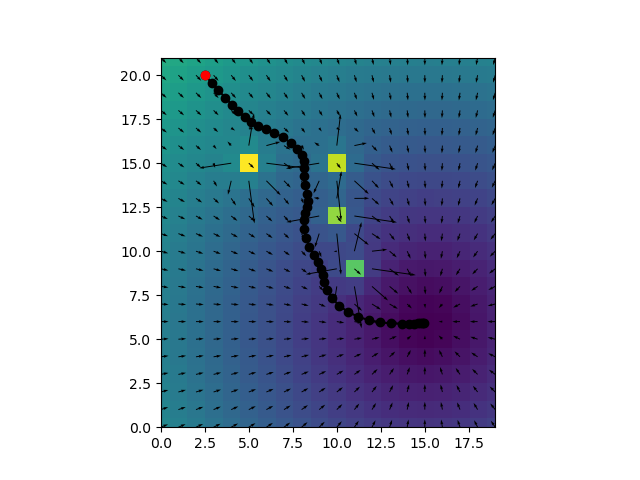

In [ ]:
# Punto inicial
pi = np.array([2.5, 20.])

# Almacenamiento de la trayectoria
traj = pi

# Máximo número de iteraciones
max_iter = 1000

for i in range(max_iter):
    # Cálculo de los campos
    Ur, fr = repulsive_potentials(pi, qobst, d_rep, k_rep, Umax)
    Ua, fa = attractive_potential(pi, qf, d_atr, k_atr)
    # Actualización de la posición usando las fuerzas repulsiva y atractiva
    pi = pi + 0.6*(fr+fa)
    # Almacenamiento de la trayectoria
    traj = np.vstack([traj, pi])
    # Detener el bucle si se está suficientemente cerca del objetivo
    if (np.linalg.norm(pi-qf) < 0.1):
        print("Se llegó al objetivo en {} iteraciones".format(i))
        break

plt.figure()
plt.imshow(Utot); plt.quiver(x, y, ftot[:,:,0], ftot[:,:,1])
plt.axis([xv[0], xv[-1], yv[0], yv[-1]])
plt.plot(traj[:,0], traj[:,1], 'k'); plt.plot(traj[:,0], traj[:,1], 'ko'); plt.plot(traj[0,0], traj[0,1], 'ro')
# Plot
plt.show()